<a href="https://colab.research.google.com/github/marpulli246/Kaggle/blob/main/KaggleNovPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell #enables multiple cell outputs withput print command.
InteractiveShell.ast_node_interactivity = "all"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train =  pd.read_csv('/content/drive/MyDrive/Kaggle_Nov/train.csv.gz')
test = pd.read_csv('/content/drive/MyDrive/Kaggle_Nov/test.csv.gz')

In [ ]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,0.012330,1.607190,-0.318058,0.560137,2.806880,1.35114,2.535930,0.197527,0.676494,1.98979,-3.842450,0.037380,0.230322,3.33055,0.009397,0.144738,3.05131,1.30362,0.033225,-0.018284,2.748210,-0.009294,-0.036271,-0.049871,0.019484,3.898460,11.2863,1.138020,3.366880,4.94446,...,-0.027551,0.019483,-0.048826,0.050748,3.729300,5.017440,4.186880,0.063342,0.121043,1.37175,4.017450,0.167613,0.039753,2.042360,-0.016614,0.107679,3.507250,0.013660,-0.097023,5.396070,0.244457,3.49184,0.113090,-0.015472,4.208790,4.106560,0.037227,-0.118814,0.067086,0.010739,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,0.037706,0.331749,0.325091,0.062040,2.262150,4.33943,-0.224999,0.233586,3.381280,1.90299,0.067874,-0.051268,0.006135,2.60444,0.103441,0.067638,4.75362,1.85552,-0.181834,0.008359,3.166340,0.011850,0.022292,0.069320,0.117109,0.315276,24.4807,1.672270,-0.409067,4.95475,...,-0.010841,0.064584,0.102548,0.093611,0.964089,0.630422,4.307340,0.091289,-0.036360,3.61767,3.103240,0.000657,0.051302,1.924620,0.123294,-0.022671,1.548120,-0.010397,0.058330,3.661310,-0.118386,2.35739,-0.009112,0.178701,4.097350,3.532890,0.005244,0.121381,0.109968,0.135838,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,0.056995,0.328684,2.968810,0.105244,2.069490,5.30986,1.354790,-0.262018,1.379080,1.48091,0.020542,-0.008806,0.109348,1.68365,0.038180,0.123716,1.11248,3.57166,0.120601,0.082069,2.233520,0.002270,0.045182,0.014405,0.011599,-0.502849,33.7382,1.417500,1.071350,3.22296,...,0.027571,-0.007121,-0.048914,-0.002574,1.865090,2.404170,0.411741,0.057749,0.525174,2.16879,0.828297,0.089848,0.093744,4.949010,-0.010978,0.076671,0.266784,0.038691,0.382731,3.847600,-0.121482,3.74084,0.147098,-0.016566,0.614651,2.125840,0.078828,0.979808,0.026758,0.117310,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,0.123494,1.002680,4.869600,0.058411,2.497850,1.23843,2.348360,0.175475,1.608890,2.02881,0.042086,0.005141,0.076506,1.65122,0.111813,0.121641,0.58912,4.23692,-0.032843,0.058168,0.712927,0.097465,0.072744,0.000324,0.063362,4.063820,25.3824,0.576572,2.026210,2.96843,...,0.110884,0.026837,2.931160,0.068112,-0.495192,1.345280,2.242750,0.035611,-0.139274,4.74243,3.292740,0.117877,0.065605,0.556711,-0.058029,0.070501,1.101250,0.068559,0.162928,4.070180,-0.008835,3.89678,0.913739,-0.163204,3.074850,4.356780,-0.048894,4.917990,0.069930,-0.015347,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,0.034166,0.711483,0.769988,0.057555,0.957257,3.71145,5.464350,0.287104,2.616950,1.38403,0.074883,-0.010543,0.109121,2.27602,0.008023,0.045235,4.35954,5.07562,-0.009376,0.528966,4.053350,0.020000,0.106828,0.051307,0.045939,3.402460,15.5615,1.635960,0.047029,4.01771,...,0.075586,0.032114,-0.042284,0.047974,-0.294184,5.065600,1.050290,0.034019,0.024611,3.12578,2.262840,0.082462,-0.023296,5.615850,0.086238,0.157568,3.725670,0.061247,0.086603,0.607246,1.411090,2.06062,-0.023154,0.011234,2.155530,0.914518,0.044521,0.375731,0.134351,0.013781,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


In [ ]:
#Modify data type to reduce dataframe size to ease processing load.
for column in train:
  c_min = train[column].min()
  c_max = train[column].max()
  if train[column].dtype=='float64':
     if (
        c_min > np.finfo(np.float16).min
        and c_max < np.finfo(np.float16).max
     ):
        train[column] = train[column].astype(np.float16)
     else: train[column] = train[column].astype(np.float32)   
    #df[column]=pd.to_numeric(df[column], downcast='float16')
  if train[column].dtype=='int64':
    train[column]=pd.to_numeric(train[column], downcast='integer')
train.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float16(100), int32(1), int8(1)
memory usage: 117.3 MB


In [4]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train.iloc[:,1:101]))
test_scaled = pd.DataFrame(scaler.fit_transform(test.iloc[:,1:101]))
X = train.iloc[:,1:101]
y = train['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
pd.DataFrame(train).info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: float64(100), int64(2)
memory usage: 466.9 MB


In [5]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25,random_state=1)

Keras Sequaential()

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from tensorflow.keras import regularizers

In [61]:
nnetwork = models.Sequential()

In [62]:
nnetwork.add(layers.Dense(units=32, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(100,)))
nnetwork.add(layers.Dense(units=32, activation="relu"))
#nnetwork.add(layers.Dense(units=10))
nnetwork.add(layers.Dense(units=32, activation="relu"))
nnetwork.add(layers.Dense(units=1, activation="sigmoid"))

In [63]:
nnetwork.compile(loss="binary_crossentropy", 
optimizer="adam", 
metrics=["accuracy"])

In [ ]:
#Train neural network.
history = nnetwork.fit(X_train,
y_train, 
epochs=50,
verbose=1,
batch_size=50,
validation_data=(X_test, y_test))

In [94]:
#Predict
preds = nnetwork.predict(test_scaled)
preds

array([[0.72424215],
       [0.7257259 ],
       [0.7448243 ],
       ...,
       [0.73422027],
       [0.72339463],
       [0.7374708 ]], dtype=float32)

In [1]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss)+1)

NameError: ignored

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

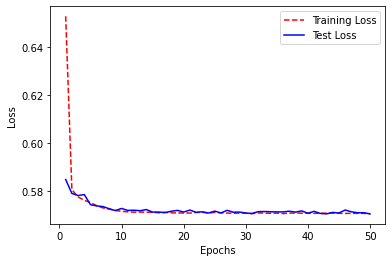

In [91]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [92]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

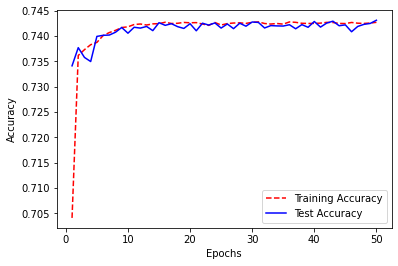

In [93]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Keras Sequaential() with pipeline

In [24]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from keras.layers import Embedding
from keras.layers import LSTM

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [25]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=100, kernel_initializer='normal', activation='tanh')) #10 perceptrons 8
    model.add(Dropout(0.3)) #new
    model.add(Dense(16, kernel_initializer='normal', activation='tanh')) #10 perceptrons added layer, 16 optimal
    model.add(Dropout(0.3)) #new
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer=adam
    return model

In [26]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=600, verbose=1, validation_split=0.3, random_state=24))) #batch size = 500 on best
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True) #5 splits
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
560/560 [==============================] - 2s 3ms/step - loss: 0.6056 - accuracy: 0.7110 - val_loss: 0.5879 - val_accuracy: 0.7349
Epoch 2/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.7409 - val_loss: 0.5789 - val_accuracy: 0.7380
Epoch 3/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5752 - accuracy: 0.7437 - val_loss: 0.5761 - val_accuracy: 0.7394
Epoch 4/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5732 - accuracy: 0.7446 - val_loss: 0.5746 - val_accuracy: 0.7397
Epoch 5/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5721 - accuracy: 0.7450 - val_loss: 0.5737 - val_accuracy: 0.7402
Epoch 6/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5709 - accuracy: 0.7452 - val_loss: 0.5730 - val_accuracy: 0.7406
Epoch 7/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5702 - accuracy: 0.7454 - val_loss: 0.5726 - val_accuracy: 0.7405

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
560/560 [==============================] - 2s 3ms/step - loss: 0.6062 - accuracy: 0.7123 - val_loss: 0.5868 - val_accuracy: 0.7357
Epoch 2/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.7407 - val_loss: 0.5780 - val_accuracy: 0.7395
Epoch 3/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5754 - accuracy: 0.7433 - val_loss: 0.5754 - val_accuracy: 0.7403
Epoch 4/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5735 - accuracy: 0.7443 - val_loss: 0.5742 - val_accuracy: 0.7400
Epoch 5/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5727 - accuracy: 0.7448 - val_loss: 0.5728 - val_accuracy: 0.7417
Epoch 6/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.7450 - val_loss: 0.5725 - val_accuracy: 0.7411
Epoch 7/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5709 - accuracy: 0.7452 - val_loss: 0.5721 - val_accuracy: 0.7414

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
560/560 [==============================] - 2s 3ms/step - loss: 0.6055 - accuracy: 0.7123 - val_loss: 0.5869 - val_accuracy: 0.7349
Epoch 2/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5806 - accuracy: 0.7409 - val_loss: 0.5779 - val_accuracy: 0.7392
Epoch 3/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5753 - accuracy: 0.7436 - val_loss: 0.5751 - val_accuracy: 0.7400
Epoch 4/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5735 - accuracy: 0.7444 - val_loss: 0.5735 - val_accuracy: 0.7414
Epoch 5/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5725 - accuracy: 0.7448 - val_loss: 0.5729 - val_accuracy: 0.7412
Epoch 6/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.7448 - val_loss: 0.5716 - val_accuracy: 0.7424
Epoch 7/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5711 - accuracy: 0.7453 - val_loss: 0.5714 - val_accuracy: 0.7423

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
560/560 [==============================] - 3s 4ms/step - loss: 0.6059 - accuracy: 0.7120 - val_loss: 0.5862 - val_accuracy: 0.7361
Epoch 2/300
560/560 [==============================] - 4s 7ms/step - loss: 0.5804 - accuracy: 0.7409 - val_loss: 0.5773 - val_accuracy: 0.7405
Epoch 3/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5757 - accuracy: 0.7432 - val_loss: 0.5747 - val_accuracy: 0.7407
Epoch 4/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5736 - accuracy: 0.7440 - val_loss: 0.5731 - val_accuracy: 0.7423
Epoch 5/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5726 - accuracy: 0.7443 - val_loss: 0.5722 - val_accuracy: 0.7423
Epoch 6/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.7446 - val_loss: 0.5718 - val_accuracy: 0.7418
Epoch 7/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5711 - accuracy: 0.7448 - val_loss: 0.5710 - val_accuracy: 0.7422

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
560/560 [==============================] - 3s 4ms/step - loss: 0.6059 - accuracy: 0.7120 - val_loss: 0.5865 - val_accuracy: 0.7347
Epoch 2/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5800 - accuracy: 0.7415 - val_loss: 0.5777 - val_accuracy: 0.7392
Epoch 3/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5751 - accuracy: 0.7442 - val_loss: 0.5753 - val_accuracy: 0.7394
Epoch 4/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5730 - accuracy: 0.7449 - val_loss: 0.5742 - val_accuracy: 0.7396
Epoch 5/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5719 - accuracy: 0.7451 - val_loss: 0.5732 - val_accuracy: 0.7407
Epoch 6/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5710 - accuracy: 0.7454 - val_loss: 0.5727 - val_accuracy: 0.7406
Epoch 7/300
560/560 [==============================] - 2s 3ms/step - loss: 0.5704 - accuracy: 0.7458 - val_loss: 0.5720 - val_accuracy: 0.7409

In [27]:
history = pipeline.fit(X, y)
#losses = history.history["mean_absolute_error"]

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/300
700/700 [==============================] - 3s 4ms/step - loss: 0.6012 - accuracy: 0.7173 - val_loss: 0.5834 - val_accuracy: 0.7372
Epoch 2/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5778 - accuracy: 0.7422 - val_loss: 0.5762 - val_accuracy: 0.7405
Epoch 3/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5743 - accuracy: 0.7441 - val_loss: 0.5743 - val_accuracy: 0.7403
Epoch 4/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5722 - accuracy: 0.7448 - val_loss: 0.5731 - val_accuracy: 0.7409
Epoch 5/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5716 - accuracy: 0.7450 - val_loss: 0.5723 - val_accuracy: 0.7411
Epoch 6/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5707 - accuracy: 0.7454 - val_loss: 0.5716 - val_accuracy: 0.7425
Epoch 7/300
700/700 [==============================] - 2s 3ms/step - loss: 0.5700 - accuracy: 0.7455 - val_loss: 0.5712 - val_accuracy: 0.7417

In [28]:
pipeline.score(X,y)

1000/1000 [==============================] - 1s 1ms/step


0.74742

In [29]:
preds = pipeline.predict_proba(test.iloc[:,1:101])
preds

900/900 [==============================] - 1s 1ms/step


array([[0.25104898, 0.748951  ],
       [0.25104898, 0.748951  ],
       [0.25104898, 0.748951  ],
       ...,
       [0.25129622, 0.7487038 ],
       [0.25104898, 0.748951  ],
       [0.25104898, 0.748951  ]], dtype=float32)

In [30]:
#Submission file creation
submission = pd.read_csv('/content/drive/MyDrive/Kaggle_Nov/sample_submission.csv')
submission["target"] = preds[:,-1]
submission.to_csv("/content/drive/MyDrive/Kaggle_Nov/submission1130_6.csv", index=False)
submission.head(10)

,id,target
0,600000,0.748951
1,600001,0.748951
2,600002,0.748951
3,600003,0.249003
4,600004,0.748951
5,600005,0.248751
6,600006,0.248751
7,600007,0.455979
8,600008,0.748951
9,600009,0.248751
